In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_recipes = pd.read_csv('/content/gdrive/MyDrive/Data/RAW_recipes.csv')
df_user_interaction= pd.read_csv('/content/gdrive/MyDrive/Data/RAW_interactions.csv')

In [ ]:
df_recipes.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
df_user_interaction.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
print(df_recipes.shape)
print(df_user_interaction.shape)

(231637, 12)
(1132367, 5)


In [ ]:
df_recipes.info()
df_user_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id  

In [ ]:
#d.plot(kind='bar',xlim='name',ylim='minutes')


In [ ]:
print(df_recipes.isnull().sum())
print("------------------")
print(df_user_interaction.isnull().sum())

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64
------------------
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [ ]:
temp = df_user_interaction['recipe_id'].value_counts()[:10].to_dict()
print(temp)


{2886: 1613, 27208: 1601, 89204: 1579, 39087: 1448, 67256: 1322, 54257: 1305, 22782: 1234, 32204: 1220, 69173: 997, 68955: 904}


In [ ]:
mask = df_recipes['id'].isin(temp.keys())
df_recipes[mask]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
574,whatever floats your boat brownies,32204,35,37305,2002-06-25,"['60-minutes-or-less', 'time-to-make', 'course...","[390.7, 30.0, 161.0, 7.0, 12.0, 50.0, 17.0]",14,"['preheat oven to 350f', 'grease an 8 inch squ...","these are absolutely the chewiest, moistest, f...","['butter', 'unsweetened cocoa', 'sugar', 'eggs...",14
22168,best banana bread,2886,65,1762,1999-09-26,"['time-to-make', 'course', 'main-ingredient', ...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,"['butter', 'granulated sugar', 'eggs', 'banana...",8
22388,best ever banana cake with cream cheese frosting,67256,75,82367,2003-07-24,"['weeknight', 'time-to-make', 'course', 'main-...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]",18,"['preheat oven to 275f', 'grease and flour a 9...",this is one of (if not) the best banana cake i...,"['bananas', 'lemon juice', 'flour', 'baking so...",13
62431,creamy cajun chicken pasta,39087,25,30534,2002-09-02,"['30-minutes-or-less', 'time-to-make', 'course...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]",4,['place chicken and cajun seasoning in a bowl ...,n'awlin's style of chicken with an updated alf...,"['boneless skinless chicken breast halves', 'l...",12
66687,crock pot chicken with black beans cream cheese,89204,243,137839,2004-04-16,"['time-to-make', 'course', 'main-ingredient', ...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]",5,"['take 4-5 frozen , yes , frozen , boneless ch...",i love this crock-pot chicken recipe for two r...,"['boneless chicken breasts', 'black beans', 'c...",5
114444,japanese mum s chicken,68955,45,29196,2003-08-13,"['60-minutes-or-less', 'time-to-make', 'course...","[313.1, 19.0, 54.0, 61.0, 62.0, 17.0, 5.0]",5,['place all the ingredients in a saucepan over...,"we have a japanese girl, tomoko, living with u...","['chicken drumsticks', 'water', 'balsamic vine...",7
115303,jo mama s world famous spaghetti,22782,80,25455,2002-03-17,"['weeknight', 'time-to-make', 'course', 'main-...","[555.9, 40.0, 45.0, 85.0, 59.0, 45.0, 16.0]",10,"['in large , heavy stockpot , brown italian sa...",my kids will give up a steak dinner for this s...,"['italian sausage', 'onion', 'garlic cloves', ...",16
118161,kittencal s italian melt in your mouth meatballs,69173,50,89831,2003-08-20,"['60-minutes-or-less', 'time-to-make', 'course...","[1312.6, 129.0, 8.0, 108.0, 214.0, 174.0, 8.0]",5,['mix all ingredients together in a large bowl...,cooking the meatballs in simmering pasta sauce...,"['ground beef', 'egg', 'parmesan cheese', 'bre...",10
213826,to die for crock pot roast,27208,545,28201,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...","['beef roast', 'brown gravy mix', 'dried itali...",5
229262,yes virginia there is a great meatloaf,54257,80,24670,2003-02-17,"['time-to-make', 'course', 'main-ingredient', ...","[493.1, 43.0, 75.0, 52.0, 70.0, 55.0, 7.0]",15,['meatloaf: combine meat loaf ingredients and ...,absolutely delicious meatloaf and sauce! those...,"['ground beef', 'bread', 'egg', 'vidalia onion...",10


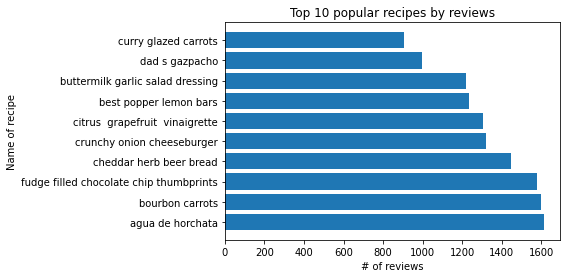

In [ ]:
x = list(df_recipes['name'][temp.keys()])
y = list(temp.values())
fig, ax = plt.subplots()
ax.barh(x, y, align='center')
ax.set(title = "Top 10 popular recipes by reviews",
       xlabel = "# of reviews",
       ylabel = "Name of recipe")
plt.show()

In [ ]:
rating_count = df_user_interaction['rating'].value_counts().to_dict()

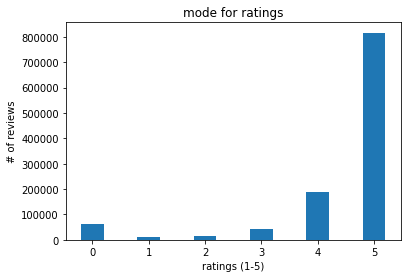

In [ ]:
x = list(rating_count.keys())
y = list(rating_count.values())
fig, ax = plt.subplots()
ax.bar(x, y, align='center', width=0.4)
ax.set(title = "mode for ratings",
       xlabel = "ratings (1-5)",
       ylabel = "# of reviews")
plt.show()
plt.show()

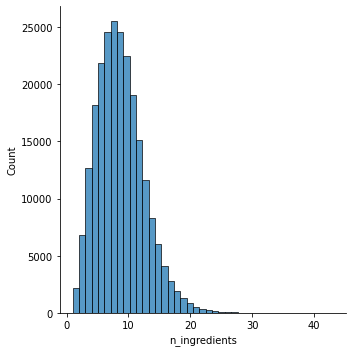

In [ ]:
sns.displot(df_recipes.n_ingredients,bins=41, kde=False)

In [ ]:
df_recipes.n_ingredients.value_counts().to_dict()

{1: 25,
 2: 2127,
 3: 6800,
 4: 12650,
 5: 18217,
 6: 21840,
 7: 24599,
 8: 25532,
 9: 24599,
 10: 22430,
 11: 19094,
 12: 15165,
 13: 11640,
 14: 8284,
 15: 6014,
 16: 4145,
 17: 2793,
 18: 1913,
 19: 1279,
 20: 852,
 21: 529,
 22: 346,
 23: 244,
 24: 178,
 25: 107,
 26: 68,
 27: 55,
 28: 33,
 29: 22,
 30: 20,
 31: 13,
 32: 5,
 33: 4,
 34: 3,
 35: 4,
 36: 1,
 37: 2,
 38: 1,
 39: 1,
 40: 2,
 43: 1}

In [ ]:
temp_df = df_user_interaction.groupby(['recipe_id'])['rating'].agg(lambda x: x.unique().mean())

In [ ]:
df_av_rating = pd.DataFrame(temp_df.to_dict().items(), columns=['id', 'av_rating'])
df_av_rating.sort_values(['id'])

,id,av_rating
0,38,4.500000
1,39,3.000000
2,40,3.333333
3,41,4.500000
4,43,1.000000
...,...,...
231632,537459,5.000000
231633,537485,5.000000
231634,537543,0.000000
231635,537671,0.000000


In [ ]:
df_recipes.sort_values('id')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
126987,low fat berry blue frozen dessert,38,1485,1533,1999-08-09,"['weeknight', 'time-to-make', 'course', 'prepa...","[170.9, 3.0, 120.0, 1.0, 6.0, 6.0, 12.0]",13,"['toss 2 cups berries with sugar', 'let stand ...","this is yummy and low-fat, it always turns out...","['blueberries', 'granulated sugar', 'vanilla y...",4
23695,biryani,39,265,1567,1999-08-29,"['weeknight', 'time-to-make', 'course', 'main-...","[1110.7, 90.0, 81.0, 15.0, 126.0, 82.0, 28.0]",17,['soak saffron in warm milk for 5 minutes and ...,"delhi, india","['saffron', 'milk', 'hot green chili peppers',...",26
22701,best lemonade,40,35,1566,1999-09-05,"['60-minutes-or-less', 'time-to-make', 'course...","[311.1, 0.0, 308.0, 0.0, 0.0, 0.0, 27.0]",8,"['into a 1 quart jar with tight fitting lid , ...",this is from one of my first good house keepi...,"['sugar', 'lemons, rind of', 'fresh water', 'f...",6
36412,carina s tofu vegetable kebabs,41,1460,1586,1999-09-03,"['weeknight', 'time-to-make', 'course', 'main-...","[536.1, 36.0, 128.0, 64.0, 58.0, 19.0, 21.0]",18,"['drain the tofu , carefully squeezing out exc...",this dish is best prepared a day in advance to...,"['extra firm tofu', 'eggplant', 'zucchini', 'r...",15
22217,best blackbottom pie,43,140,34879,1999-08-21,"['weeknight', 'time-to-make', 'course', 'cuisi...","[437.9, 29.0, 170.0, 11.0, 13.0, 54.0, 19.0]",35,"['graham cracker crust: in small bowl , combin...","sweet, chocolatey, yummy","['graham cracker crumbs', 'sugar', 'butter', '...",15
...,...,...,...,...,...,...,...,...,...,...,...,...
13104,bailey s chocotini,537459,10,400708,2018-11-10,"['15-minutes-or-less', 'time-to-make', 'course...","[220.7, 15.0, 49.0, 2.0, 3.0, 30.0, 4.0]",5,"['to layer: add chocolate liqueur to glass', '...",a recipe that recipe complements the cocoa in ...,"['baileys irish cream', 'chocolate liqueur', '...",3
1547,5 ingredient salted caramel crumble bars,537485,45,2000378667,2018-11-12,"['60-minutes-or-less', 'time-to-make', 'course...","[52.8, 3.0, 0.0, 4.0, 1.0, 1.0, 2.0]",21,"['1', 'heat oven to 350f spray 8-inch square p...",delicious,"['pillsbury sugar cookie dough', 'caramel topp...",5
137661,moist gingerbread cake,537543,55,2001201872,2018-11-16,"['60-minutes-or-less', 'time-to-make', 'course...","[1617.0, 104.0, 213.0, 8.0, 40.0, 203.0, 80.0]",8,"['preheat the oven to 350&deg', 'f grease a lo...",a slightly sticky loaf cake flavoured with gin...,"['unsalted butter', 'applesauce', 'egg', 'unsu...",10
145532,nutcracker peppermint red velvet cake pops,537671,135,2002198506,2018-11-28,"['time-to-make', 'course', 'preparation', 'occ...","[207.9, 12.0, 93.0, 10.0, 6.0, 8.0, 10.0]",54,"['before you begin , you will need to gather t...",rich red velvet cake combines with cool pepper...,"[""devil's food cake mix"", 'eggs', 'buttermilk'...",12


In [ ]:
df_av_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         231637 non-null  int64  
 1   av_rating  231637 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.5 MB


In [ ]:
frames= [df_av_rating, df_recipes]
df_recipes_updated = pd.merge(df_recipes, df_av_rating,
                              on = 'id')
print(df_recipes_updated.shape)
df_recipes_updated.head()

(231637, 12)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
